# <font color = 'green'> Points within a Polygon shape template

#### Documentation: Notebook assessing referenced point data within Polygon shapes
   - Count of points in poly by 3 buffer sizes
   
#### Author: Alex Armstrong
#### Created: 08/2022
#### Version: 0.1

## <font color = 'green'> Set up workbook

In [1]:
!python -m pip install adlfs
!pip install geopandas
!pip install adlfs
!pip install pygeos
!pip install rtree

In [2]:
import pandas as pd
import numpy as np
import os
import geopandas as gpd
from shapely.geometry import Point
from zipfile import ZipFile
import matplotlib.pyplot as plt
import warnings
from tqdm import tqdm

In [3]:
warnings.filterwarnings('ignore')

## <font color = 'green'> Import Point data

#### <font color = 'red'> Load small sample size for test run

In [7]:
%%time

UPRN = pd.read_csv('UPRN_All.csv', nrows=10000,low_memory=False)
UPRN 

CPU times: user 348 ms, sys: 75.8 ms, total: 423 ms
Wall time: 1.18 s


,UPRN,LOGICAL_STATUS21,PARENT_UPRN,X_COORDINATE,Y_COORDINATE,RPC,POSTAL_ADDRESS,POSTCODE_LOCATOR,MULTI_OCC_COUNT,CLASSIFICATION_CODE,CLASS_SCHEME,Base_Class
0,1,1,NaN,358263.47,172798.15,2,D,BS1 5TR,4,CO01LG,AddressBase Premium Classification Scheme,C
1,26,8,NaN,352967.00,181077.00,1,L,BS11 0YA,0,CI,AddressBase Premium Classification Scheme,C
2,27,8,NaN,352967.00,181077.00,1,N,BS11 0YA,0,C,AddressBase Premium Classification Scheme,C
3,30,1,NaN,354800.00,180469.00,2,D,BS10 7RZ,0,RD03,AddressBase Premium Classification Scheme,R
4,31,1,NaN,354796.00,180460.00,2,D,BS10 7RZ,0,RD03,AddressBase Premium Classification Scheme,R
...,...,...,...,...,...,...,...,...,...,...,...,...
1395,1455,1,NaN,356965.00,179463.00,1,D,BS10 7LQ,0,RD04,AddressBase Premium Classification Scheme,R
1396,1456,1,NaN,356013.00,179463.00,1,D,BS10 7NP,0,RD04,AddressBase Premium Classification Scheme,R
1397,1457,1,NaN,358590.00,179463.00,1,D,BS10 6JU,0,CR08,AddressBase Premium Classification Scheme,C
1398,1458,1,NaN,356430.00,179463.00,2,D,BS10 7LZ,0,RD02,AddressBase Premium Classification Scheme,R


#### <font color=Green> Convert imported UPRN data to geo-dataframe

In [8]:
coords = [Point(xy) for xy in zip(UPRN.X_COORDINATE.values, UPRN.Y_COORDINATE.values)]
geo_pcu = gpd.GeoDataFrame(UPRN, geometry=coords, crs='EPSG:27700')

In [9]:
geo_pcu

,UPRN,LOGICAL_STATUS21,PARENT_UPRN,X_COORDINATE,Y_COORDINATE,RPC,POSTAL_ADDRESS,POSTCODE_LOCATOR,MULTI_OCC_COUNT,CLASSIFICATION_CODE,CLASS_SCHEME,Base_Class,geometry
0,1,1,NaN,358263.47,172798.15,2,D,BS1 5TR,4,CO01LG,AddressBase Premium Classification Scheme,C,POINT (358263.470 172798.150)
1,26,8,NaN,352967.00,181077.00,1,L,BS11 0YA,0,CI,AddressBase Premium Classification Scheme,C,POINT (352967.000 181077.000)
2,27,8,NaN,352967.00,181077.00,1,N,BS11 0YA,0,C,AddressBase Premium Classification Scheme,C,POINT (352967.000 181077.000)
3,30,1,NaN,354800.00,180469.00,2,D,BS10 7RZ,0,RD03,AddressBase Premium Classification Scheme,R,POINT (354800.000 180469.000)
4,31,1,NaN,354796.00,180460.00,2,D,BS10 7RZ,0,RD03,AddressBase Premium Classification Scheme,R,POINT (354796.000 180460.000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,1455,1,NaN,356965.00,179463.00,1,D,BS10 7LQ,0,RD04,AddressBase Premium Classification Scheme,R,POINT (356965.000 179463.000)
1396,1456,1,NaN,356013.00,179463.00,1,D,BS10 7NP,0,RD04,AddressBase Premium Classification Scheme,R,POINT (356013.000 179463.000)
1397,1457,1,NaN,358590.00,179463.00,1,D,BS10 6JU,0,CR08,AddressBase Premium Classification Scheme,C,POINT (358590.000 179463.000)
1398,1458,1,NaN,356430.00,179463.00,2,D,BS10 7LZ,0,RD02,AddressBase Premium Classification Scheme,R,POINT (356430.000 179463.000)


## <font color = 'green'> Import referenced location polygon data

In [10]:
poly = gpd.read_file('GB_Foreshore.zip')

In [11]:
poly

,id,geometry
0,1.0,"POLYGON ((394100.400 1140285.630, 394090.050 1..."
1,2.0,"POLYGON ((394614.670 1140684.510, 394609.690 1..."
2,3.0,"POLYGON ((395136.470 1141058.870, 395134.290 1..."
3,4.0,"POLYGON ((395108.550 1141207.000, 395107.180 1..."
4,5.0,"POLYGON ((395183.500 1141252.000, 395148.240 1..."
...,...,...
37036,37037.0,"POLYGON ((501978.700 102319.700, 501962.110 10..."
37037,37038.0,"POLYGON ((501565.980 102371.850, 501565.440 10..."
37038,37039.0,"POLYGON ((501322.440 103177.360, 501333.140 10..."
37039,37040.0,"POLYGON ((501319.300 103176.300, 501312.810 10..."


In [12]:
from shapely.ops import unary_union

In [13]:
%%time 
poly_union = poly.unary_union

CPU times: user 52.5 s, sys: 587 ms, total: 53.1 s
Wall time: 53.1 s


In [14]:
geo_poly = gpd.GeoDataFrame(poly.unary_union)

## <font color = 'green'> Plot initial map to look at data

In [15]:
gb_boundary = gpd.read_file('GB_Boundaries_2017.zip')

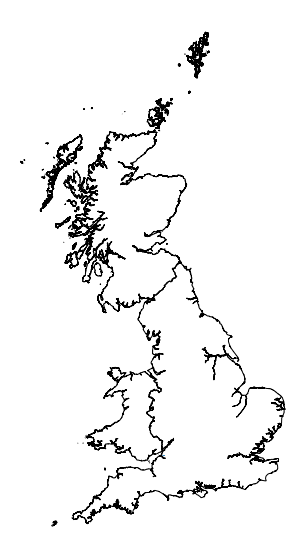

In [16]:
plt.figure()
fig, ax = plt.gcf(), plt.gca()
fig.set_size_inches(10, 10)
#loc_data_geo.plot(ax=ax, markersize=2)
geo_pcu.plot(ax=ax, alpha=0.05, markersize=0.1)
gb_boundary.boundary.plot(color='black', linewidth=1, ax=ax)
ax.axis('off');

## <font color = 'green'> Count points within buffer of Polygon

### <font color = 'blue'> Amend distance field below to change size of buffer - *__in meters__*

In [17]:
distance_1 = 100
distance_2 = 250
distance_3 = 500

### <font color = 'blue'> Create buffered polygon shapes based on distances above

In [18]:
%%time
union_1 = poly.unary_union.buffer(distance_1)

CPU times: user 2min 7s, sys: 2.64 s, total: 2min 10s
Wall time: 2min 10s


In [19]:
%%time
union_2 = poly.unary_union.buffer(distance_2)

CPU times: user 3min 22s, sys: 2.43 s, total: 3min 25s
Wall time: 3min 25s


In [20]:
%%time
union_3 = poly.unary_union.buffer(distance_3)

CPU times: user 7min 49s, sys: 4.04 s, total: 7min 53s
Wall time: 7min 53s


### <font color = 'blue'> Create dataframes used for intersections from buffered polygons

In [21]:
poly_buffer_df_1 = gpd.GeoDataFrame(union_1, index=[*range(len(union_1))], columns=['geometry'], crs='EPSG:27700')

In [22]:
poly_buffer_df_2 = gpd.GeoDataFrame(union_2, index=[*range(len(union_2))], columns=['geometry'], crs='EPSG:27700')

In [23]:
poly_buffer_df_3 = gpd.GeoDataFrame(union_3, index=[*range(len(union_3))], columns=['geometry'], crs='EPSG:27700')

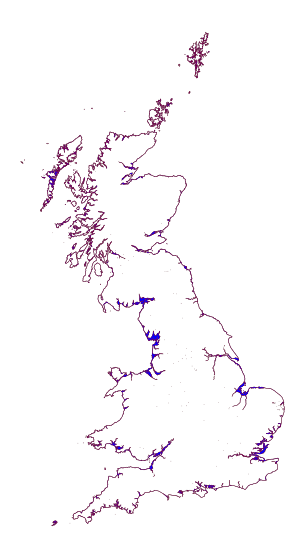

In [24]:
plt.figure()
fig, ax = plt.gcf(), plt.gca()
fig.set_size_inches(10, 10)
poly_buffer_df_3.plot(color='black', linewidth=1, ax=ax, linestyle = 'dashed')
poly_buffer_df_2.plot(color='red', linewidth=1, ax=ax)
poly_buffer_df_1.plot(color='blue', linewidth=1, ax=ax)
ax.axis('off');

In [25]:
fig.savefig('boundary.png', dpi = 1000)

### <font color = 'blue'> Create counts for each buffer size

#### <font color = 'pink'> Distance 1 buffer

In [26]:
data_merged1 = gpd.sjoin(poly_buffer_df_1, geo_pcu, how="left", predicate='intersects')

In [27]:
Count1 = data_merged1.groupby(['UPRN'], as_index=False)['index_right'].count()
Count1.columns = ['UPRN',f'buffer flag {distance_1}m']

#### <font color = 'pink'> Distance 2 buffer

In [28]:
data_merged2 = gpd.sjoin(poly_buffer_df_2, geo_pcu, how="left", predicate='intersects')

In [29]:
Count2 = data_merged1.groupby(['UPRN'], as_index=False)['index_right'].count()
Count2.columns = ['UPRN',f'buffer flag {distance_2}m']

#### <font color = 'pink'> Distance 3 buffer

In [30]:
data_merged3 = gpd.sjoin(poly_buffer_df_3, geo_pcu, how="left", predicate='intersects')

In [31]:
Count3 = data_merged3.groupby(['UPRN'], as_index=False)['index_right'].count()
Count3.columns = ['UPRN',f'buffer flag {distance_3}m']

### <font color = 'blue'> Merge the three buffer counts to a single df

In [32]:
ref_data = geo_pcu.merge(Count1, on = 'UPRN', how = 'left') \
                  .merge(Count2, on = 'UPRN', how = 'left') \
                  .merge(Count3, on = 'UPRN', how = 'left')

In [33]:
ref_data

,UPRN,LOGICAL_STATUS21,PARENT_UPRN,X_COORDINATE,Y_COORDINATE,RPC,POSTAL_ADDRESS,POSTCODE_LOCATOR,MULTI_OCC_COUNT,CLASSIFICATION_CODE,CLASS_SCHEME,Base_Class,geometry,buffer flag 100m,buffer flag 250m,buffer flag 500m
0,1,1,NaN,358263.47,172798.15,2,D,BS1 5TR,4,CO01LG,AddressBase Premium Classification Scheme,C,POINT (358263.470 172798.150),NaN,NaN,NaN
1,26,8,NaN,352967.00,181077.00,1,L,BS11 0YA,0,CI,AddressBase Premium Classification Scheme,C,POINT (352967.000 181077.000),NaN,NaN,NaN
2,27,8,NaN,352967.00,181077.00,1,N,BS11 0YA,0,C,AddressBase Premium Classification Scheme,C,POINT (352967.000 181077.000),NaN,NaN,NaN
3,30,1,NaN,354800.00,180469.00,2,D,BS10 7RZ,0,RD03,AddressBase Premium Classification Scheme,R,POINT (354800.000 180469.000),NaN,NaN,NaN
4,31,1,NaN,354796.00,180460.00,2,D,BS10 7RZ,0,RD03,AddressBase Premium Classification Scheme,R,POINT (354796.000 180460.000),NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,1455,1,NaN,356965.00,179463.00,1,D,BS10 7LQ,0,RD04,AddressBase Premium Classification Scheme,R,POINT (356965.000 179463.000),NaN,NaN,NaN
1396,1456,1,NaN,356013.00,179463.00,1,D,BS10 7NP,0,RD04,AddressBase Premium Classification Scheme,R,POINT (356013.000 179463.000),NaN,NaN,NaN
1397,1457,1,NaN,358590.00,179463.00,1,D,BS10 6JU,0,CR08,AddressBase Premium Classification Scheme,C,POINT (358590.000 179463.000),NaN,NaN,NaN
1398,1458,1,NaN,356430.00,179463.00,2,D,BS10 7LZ,0,RD02,AddressBase Premium Classification Scheme,R,POINT (356430.000 179463.000),NaN,NaN,NaN


<font color = 'blue'> Tidy the DF

In [34]:
output = ref_data.drop(columns=['X_COORDINATE','Y_COORDINATE','geometry'])
output

,UPRN,LOGICAL_STATUS21,PARENT_UPRN,RPC,POSTAL_ADDRESS,POSTCODE_LOCATOR,MULTI_OCC_COUNT,CLASSIFICATION_CODE,CLASS_SCHEME,Base_Class,buffer flag 100m,buffer flag 250m,buffer flag 500m
0,1,1,NaN,2,D,BS1 5TR,4,CO01LG,AddressBase Premium Classification Scheme,C,NaN,NaN,NaN
1,26,8,NaN,1,L,BS11 0YA,0,CI,AddressBase Premium Classification Scheme,C,NaN,NaN,NaN
2,27,8,NaN,1,N,BS11 0YA,0,C,AddressBase Premium Classification Scheme,C,NaN,NaN,NaN
3,30,1,NaN,2,D,BS10 7RZ,0,RD03,AddressBase Premium Classification Scheme,R,NaN,NaN,NaN
4,31,1,NaN,2,D,BS10 7RZ,0,RD03,AddressBase Premium Classification Scheme,R,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,1455,1,NaN,1,D,BS10 7LQ,0,RD04,AddressBase Premium Classification Scheme,R,NaN,NaN,NaN
1396,1456,1,NaN,1,D,BS10 7NP,0,RD04,AddressBase Premium Classification Scheme,R,NaN,NaN,NaN
1397,1457,1,NaN,1,D,BS10 6JU,0,CR08,AddressBase Premium Classification Scheme,C,NaN,NaN,NaN
1398,1458,1,NaN,2,D,BS10 7LZ,0,RD02,AddressBase Premium Classification Scheme,R,NaN,NaN,NaN


# Load UPRN data in via chunks

<font color = 'blue'> Specify columns wanted and amend data types to reduce size impact

In [37]:
traintypes = {'UPRN': 'int64',
              'PARENT_UPRN': 'float64',
              'POSTCODE_LOCATOR':'string',
              'X_COORDINATE': 'float32',
              'Y_COORDINATE': 'float32'}

cols = list(traintypes.keys())

<font color = 'blue'> Set chunksize to import data 

In [38]:
chunksize = 2500000 # 2.5 million rows at one go

<font color = 'blue'> Use variables above to load UPRN data

In [42]:
%%time
df_list = [] # list to hold the batch dataframe
counter=1
for df_chunk in tqdm(pd.read_csv(uri, storage_options=storage_options, chunksize=chunksize)):
    coords = [Point(xy) for xy in zip(df_chunk.X_COORDINATE.values, df_chunk.Y_COORDINATE.values)]
    geo_pcu = gpd.GeoDataFrame(df_chunk, geometry=coords, crs='EPSG:27700')
    
    #Drop NI and Channel Islands
    geo_pcu['Area'] = geo_pcu['POSTCODE_LOCATOR'].str[:2]
    geo_pcu['Area'] = geo_pcu['Area'].str.replace('\d+', '')
    geo_pcu = geo_pcu.loc[~((geo_pcu['Area']=='BT') | (geo_pcu['Area']=="GY") | (geo_pcu['Area']=="JE") | (geo_pcu['Area']=="IM"))]
        
    #Find UPRN within the foreshore
    data_merged1 = gpd.sjoin(poly_buffer_df_1, geo_pcu, how="inner", predicate='intersects')
    Count1 = data_merged1.groupby(['UPRN'], as_index=False)['index_right'].count()
    Count1.columns = ['UPRN',f'buffer flag {distance_1}m']
    
    data_merged2 = gpd.sjoin(poly_buffer_df_2, geo_pcu, how="left", predicate='intersects')
    Count2 = data_merged1.groupby(['UPRN'], as_index=False)['index_right'].count()
    Count2.columns = ['UPRN',f'buffer flag {distance_2}m']
    
    data_merged3 = gpd.sjoin(poly_buffer_df_3, geo_pcu, how="left", predicate='intersects')
    Count3 = data_merged3.groupby(['UPRN'], as_index=False)['index_right'].count()
    Count3.columns = ['UPRN',f'buffer flag {distance_3}m']
    
    #Join intersected polys 
    ref_data = geo_pcu.merge(Count1, on = 'UPRN', how = 'left') \
                      .merge(Count2, on = 'UPRN', how = 'left') \
                      .merge(Count3, on = 'UPRN', how = 'left')
    
    #Tidy the output 
    output = ref_data.drop(columns=['X_COORDINATE','Y_COORDINATE','geometry'])
    
    output[f'buffer flag {distance_1}m'] = output[f'buffer flag {distance_1}m'].fillna(0)
    output[f'buffer flag {distance_2}m'] = output[f'buffer flag {distance_2}m'].fillna(0)
    output[f'buffer flag {distance_3}m'] = output[f'buffer flag {distance_3}m'].fillna(0)
    
    #Send each chunk to azure and add 1 to file name
    output.to_csv(fr'C:\Users\Alex\Desktop\df_name{counter}.csv', index = False, header=True)
    counter+=1

17it [35:39, 125.85s/it]

CPU times: user 24min 28s, sys: 11.7 s, total: 24min 40s
Wall time: 35min 40s


#### Load all the chunks back in to concact them into a single file

In [119]:
concat = pd.concat([UPRN1,UPRN2,UPRN17,UPRN3,UPRN4,UPRN5,UPRN6,UPRN7,UPRN8,UPRN9,UPRN10,
                    UPRN11,UPRN12,UPRN13,UPRN14,UPRN15,UPRN16,UPRN17])

In [122]:
len(concat)

39767958

In [123]:
concat.to_csv(fr'C:\Users\Alex\Desktop\df_name_concat.csv', index = False, header=True)